## Import TensorFlow and other libraries

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Conv1D, Conv1DTranspose
from tensorflow.keras.optimizers import Adam
from sequana import DNA
from sequana import FastA

In [32]:
from Bio import SeqIO
import numpy as np

def load_fasta(fasta_path, window_size=100):
    f = FastA(fasta_path)
    features = []
    chr_index = {}  # Nouveau : dictionnaire pour stocker les indices de chaque chromosome
    current_idx = 0
    test = 0
    for maseq in f:
        test = test+1
        if test== 2:
            print(maseq.name)
            s = DNA(maseq.sequence.upper())
            seq = maseq.sequence.upper()
            s.window = window_size
    
            df_karlin = pd.read_csv(f"../data/karlin/{maseq.name}_karlin_{window_size}.csv")
            karlin = df_karlin['Karlin'].tolist()
            gc_skews = s.get_entropy(window_size)
  
            # Assurez-vous que les tailles correspondent
            if len(gc_skews) != len(karlin):
                print(f"Warning: mismatch in window count for {maseq.name}")
                print(len(gc_skews))
                print(len(karlin))
                continue
    
             # Stocker début et fin des fenêtres pour ce chromosome
            chr_len = len(karlin)
            chr_index[maseq.name] = (current_idx, current_idx + chr_len)
            current_idx += chr_len
            
            # Combine Karlin + GC skew en un vecteur
            for k, gc in zip(karlin, gc_skews):
                feature_vector = [k, gc]
                features.append(feature_vector)

    return np.array(features, dtype=np.float32), chr_index
    


In [3]:
def build_autoencoder(input_length, num_features):
    input_layer = Input(shape=(input_length, num_features))

    # Encoder
    x = Conv1D(32, 3, padding="same", activation="relu")(input_layer)
    x = Conv1D(16, 3, padding="same", activation="relu")(x)
    
    # Decoder
    x = Conv1DTranspose(16, 3, padding="same", activation="relu")(x)
    x = Conv1DTranspose(num_features, 3, padding="same", activation="linear")(x)

    model = Model(inputs=input_layer, outputs=x)
    model.compile(optimizer=Adam(1e-3), loss="mse")
    return model

In [33]:
# 1. Chargement
X_raw = load_fasta("../data/Fasta/TriTrypDB-68_LmajorFriedlin_Genome.fasta")

# 2. Normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)

# 3. Préparer pour Conv1D : reshape vers (nb_windows, 1, num_features)
X_input = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# 4. Création et entraînement du modèle
autoencoder = build_autoencoder(input_length=1, num_features=X_input.shape[2])
# Entraînement du modèle avec suivi
history = autoencoder.fit(
    X_input, X_input,
    epochs=5,
    batch_size=256,
    verbose=1
)


LmjF.02


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

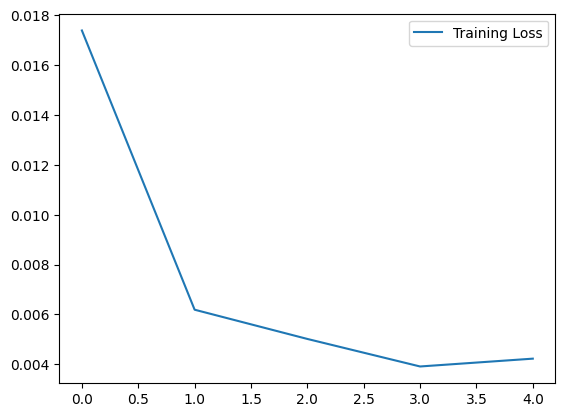

In [34]:
plt.plot(history.history["loss"], label="Training Loss")
plt.legend()


In [19]:
# Reconstruction
print("debut")
X_pred = autoencoder.predict(X_input)
print("fin")

debut
1026722/1026722 ━━━━━━━━━━━━━━━━━━━━ 855s 833us/step
fin


['LmjF.01', 'LmjF.02', 'LmjF.03', 'LmjF.04', 'LmjF.05', 'LmjF.06', 'LmjF.07', 'LmjF.08', 'LmjF.09', 'LmjF.10', 'LmjF.11', 'LmjF.12', 'LmjF.13', 'LmjF.14', 'LmjF.15', 'LmjF.16', 'LmjF.17', 'LmjF.18', 'LmjF.19', 'LmjF.20', 'LmjF.21', 'LmjF.22', 'LmjF.23', 'LmjF.24', 'LmjF.25', 'LmjF.26', 'LmjF.27', 'LmjF.28', 'LmjF.29', 'LmjF.30', 'LmjF.31', 'LmjF.32', 'LmjF.33', 'LmjF.34', 'LmjF.35', 'LmjF.36']


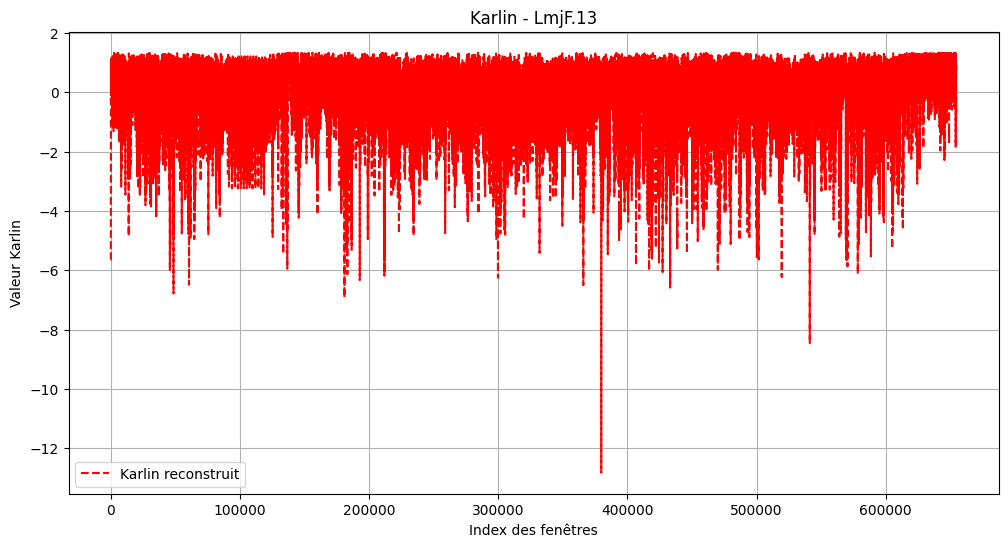

In [31]:
# Récupère le 2e chromosome
chromosomes = list(chr_index.keys())
print(chromosomes)
second_chr = chromosomes[12]
start, end = chr_index[second_chr]

# Karlin original et reconstruit
karlin_true = X_input[start:end, 0, 1]
karlin_pred = X_pred[start:end, 0, 1]

# Affichage Karlin
plt.figure(figsize=(12, 6))
#plt.plot(karlin_true, label="Karlin original", color="blue")
plt.plot(karlin_pred, label="Karlin reconstruit", color="red", linestyle="--")
plt.title(f"Karlin - {second_chr}")
plt.xlabel("Index des fenêtres")
plt.ylabel("Valeur Karlin")
plt.legend()
plt.grid(True)
plt.show()



In [16]:
test, chr_index = load_fasta("../data/Fasta/TriTrypDB-68_LmajorFriedlin_Genome.fasta")


LmjF.01
LmjF.02
LmjF.03
LmjF.04
LmjF.05
LmjF.06
LmjF.07
LmjF.08
LmjF.09
LmjF.10
LmjF.11
LmjF.12
LmjF.13
LmjF.14
LmjF.15
LmjF.16
LmjF.17
LmjF.18
LmjF.19
LmjF.20
LmjF.21
LmjF.22
LmjF.23
LmjF.24
LmjF.25
LmjF.26
LmjF.27
LmjF.28
LmjF.29
LmjF.30
LmjF.31
LmjF.32
LmjF.33
LmjF.34
LmjF.35
LmjF.36


In [ ]:
X_raw = load_fasta("../data/Fasta/TriTrypDB-68_LmajorFriedlin_Genome.fasta", window_size=100)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)

def make_sequences(X, seq_len):
    return np.array([X[i:i+seq_len] for i in range(len(X) - seq_len + 1)])

sequence_length = 10  # ← ex : 10 fenêtres = 1000 bp
X_seq = make_sequences(X_scaled, sequence_length)

print(X_seq.shape)  # (n_sequences, 10, 2)

In [20]:
X_raw = load_fasta("../data/Fasta/TriTrypDB-68_LmajorFriedlin_Genome.fasta", window_size=100)


LmjF.01
LmjF.02
LmjF.03
LmjF.04
LmjF.05
LmjF.06
LmjF.07
LmjF.08
LmjF.09
LmjF.10
LmjF.11
LmjF.12
LmjF.13
LmjF.14
LmjF.15
LmjF.16
LmjF.17
LmjF.18
LmjF.19
LmjF.20
LmjF.21
LmjF.22
LmjF.23
LmjF.24
LmjF.25
LmjF.26
LmjF.27
LmjF.28
LmjF.29
LmjF.30
LmjF.31
LmjF.32
LmjF.33
LmjF.34
LmjF.35
LmjF.36


In [23]:
# 1. Charger et normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)

# 2. Créer des séquences de fenêtres
def make_sequences(X, seq_len):
    return np.array([X[i:i+seq_len] for i in range(len(X) - seq_len + 1)])

sequence_length = 10  # Nombre de fenêtres consécutives
X_seq = make_sequences(X_scaled, sequence_length)

In [25]:
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np



# 3. Construire l'autoencodeur et définir EarlyStopping
autoencoder = build_autoencoder(input_length=sequence_length, num_features=2)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 4. Entraîner le modèle avec EarlyStopping
#history = autoencoder.fit(X_seq, X_seq, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])
history = autoencoder.fit(
    X_seq, X_seq,
    epochs=50,
    batch_size=256,
    verbose=1,
    callbacks=[early_stopping]
)


NameError: name 'X_input' is not defined

In [ ]:

# 5. Visualiser la convergence du modèle
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Convergence du modèle')
plt.show()

# 6. Faire des prédictions et calculer l'erreur de reconstruction
X_pred = autoencoder.predict(X_seq)
reconstruction_errors = np.mean((X_seq - X_pred) ** 2, axis=(1, 2))

# 7. Détecter les anomalies en fonction de l'erreur de reconstruction
threshold = np.mean(reconstruction_errors) + 3 * np.std(reconstruction_errors)
anomalies = np.where(reconstruction_errors > threshold)[0]

print(f"{len(anomalies)} anomalies détectées sur {len(X_seq)} séquences.")